In [0]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib as plt

In [0]:
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_dates_predicted_for_apocalyptic_events').text
soup = BeautifulSoup(website_url,'lxml')

In [0]:
tables = soup.find_all('table', class_='wikitable')

In [5]:
yearlist = []
for table in tables:
    ths = table.find_all('th')
    headings = [th.text.strip() for th in ths]
    for tr in table.find_all('tr'):
        tds = tr.find('td')
        if tds is not None:
          yearlist.append(tds.text)
yearlist  
  
  
    

['66–70\n',
 '365\n',
 '375–400\n',
 '500\n',
 '6 Apr 793\n',
 '800\n',
 '799–806\n',
 '847\n',
 '992–995\n',
 '1000\n',
 '1033\n',
 '1200–1260\n',
 '1284\n',
 '12901335\n',
 '1346–1351\n',
 '1368–1370\n',
 '1378\n',
 '1504\n',
 '1 Feb 1524\n',
 '20 Feb 1524\n',
 '1524–1526\n',
 '27 May 1528\n',
 '1528\n',
 '19 Oct 1533\n',
 '1533\n',
 '5 Apr 1534\n',
 '1555\n',
 '1585\n',
 '1588\n',
 '1600\n',
 '1 Feb 1624\n',
 '1648\n',
 '1651\n',
 '1654\n',
 '1656\n',
 '1655–1657\n',
 '1658\n',
 '1660\n',
 '1666\n',
 'Fifth Monarchists\n',
 '1673\n',
 '1688\n',
 '1689\n',
 '1694\n',
 'Johann Heinrich Alsted\n',
 'Johann Jacob Zimmermann\n',
 '1697\n',
 '1700\n',
 'Henry Archer\n',
 '1705–1708\n',
 '1716\n',
 '5 Apr 1719\n',
 '1700–1734\n',
 '16 Oct 1736\n',
 '1736\n',
 '1757\n',
 '19 May 1780\n',
 '1789\n',
 '17921794\n',
 '19 Nov 1795\n',
 '1793–1795\n',
 '1805\n',
 '1806\n',
 '19 Oct 1814\n',
 '1836\n',
 '1836\n',
 '28 Apr 184331 Dec 1843\n',
 '1843\n',
 '21 Mar 1844\n',
 '22 Oct 1844\n',
 '7 Aug 

In [6]:
yearList = []
for y in yearlist:
    yearList.append(y.replace('\n',''))
for i,j in enumerate(yearList):
    if any(str.isdigit(c) for c in j):
      continue
    else:
      yearList[i] = yearList[i-1]
yearList = [y.replace(' million', '000000') for y in yearList]
yearList = [y.replace(' billion', '000000000') for y in yearList]
year_list = []
for i in yearList:
    year_list.append(i.split(' ')[-1])
year_List = []
for i in year_list:
    year_List.append(i.split('–')[0])
#Need to get hands dirty sometimes
for i,y in enumerate(year_List):
    if y == '12901335':
      year_List[i] = '1290'
    if y == '17921794':
      year_List[i]='1792'
    if y == '1':
      year_List[i]='1000000000'
year_List = [y.replace(',', '') for y in year_List]
year_List = [y.replace('.', '') for y in year_List]
year_List

['66',
 '365',
 '375',
 '500',
 '793',
 '800',
 '799',
 '847',
 '992',
 '1000',
 '1033',
 '1200',
 '1284',
 '1290',
 '1346',
 '1368',
 '1378',
 '1504',
 '1524',
 '1524',
 '1524',
 '1528',
 '1528',
 '1533',
 '1533',
 '1534',
 '1555',
 '1585',
 '1588',
 '1600',
 '1624',
 '1648',
 '1651',
 '1654',
 '1656',
 '1655',
 '1658',
 '1660',
 '1666',
 '1666',
 '1673',
 '1688',
 '1689',
 '1694',
 '1694',
 '1694',
 '1697',
 '1700',
 '1700',
 '1705',
 '1716',
 '1719',
 '1700',
 '1736',
 '1736',
 '1757',
 '1780',
 '1789',
 '1792',
 '1795',
 '1793',
 '1805',
 '1806',
 '1814',
 '1836',
 '1836',
 '1843',
 '1843',
 '1844',
 '1844',
 '1847',
 '1847',
 '1862',
 '1862',
 '1863',
 '1873',
 '1881',
 '1890',
 '1901',
 '1908',
 '1910',
 '1892',
 '1914',
 '1915',
 '1918',
 '1920',
 '1925',
 '1926',
 '1934',
 '1935',
 '1936',
 '1941',
 '1943',
 '1947',
 '1954',
 '1959',
 '1962',
 '1967',
 '1967',
 '1969',
 '1969',
 '1972',
 '1974',
 '1975',
 '1975',
 '1976',
 '1977',
 '1977',
 '1979',
 '1980',
 '1981',
 '1982',
 '

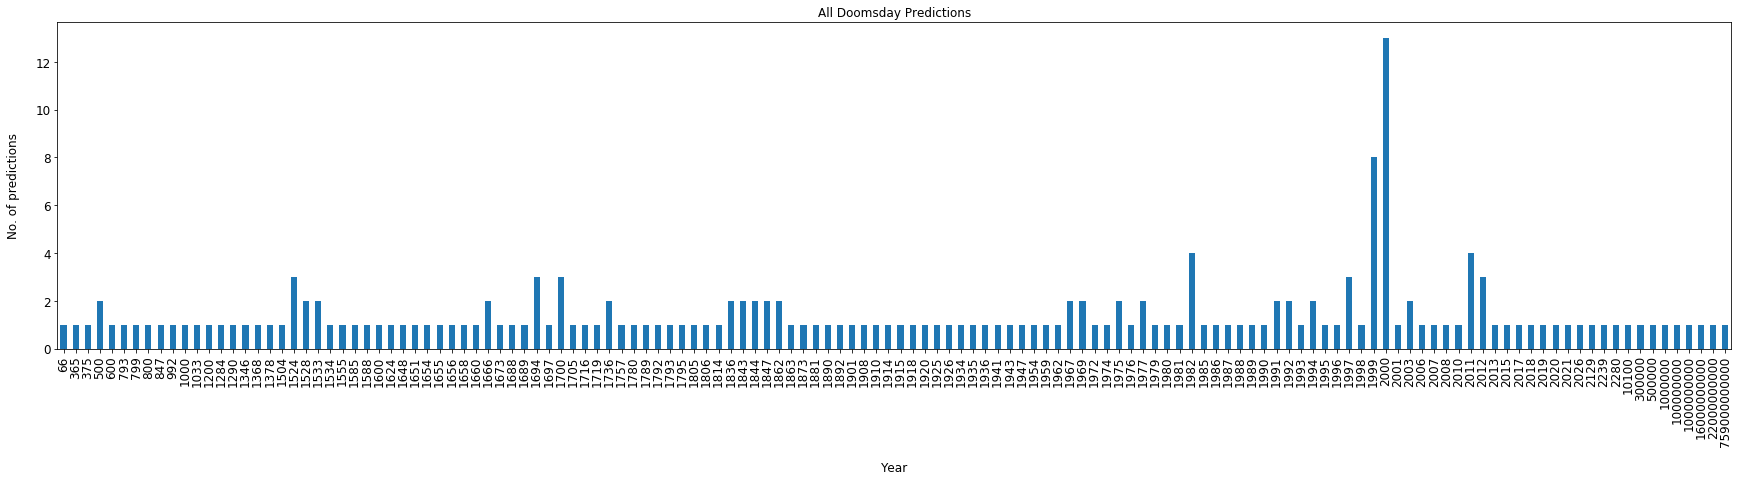

In [42]:
df = pd.DataFrame(year_List,columns=['Year']) 
df['Year'].astype(int).value_counts(sort=False).sort_index().plot(figsize=(30,6),kind='bar',by='Year')
plt.pyplot.title('All Doomsday Predictions')
plt.pyplot.xlabel('Year',fontsize=12,labelpad=15)
plt.pyplot.ylabel('No. of predictions',fontsize=12,labelpad=15)
plt.pyplot.xticks(fontsize = 12) 
plt.pyplot.yticks(fontsize = 12)
plt.pyplot.rcParams['figure.figsize'] = [5,3]

In [0]:
from google.colab import files
df.to_csv('Doomsday_data.csv')
files.download('Doomsday_data.csv')